# KNN-Based Handwritten Digit Predictor

The goal of this assignment is to apply the K-Nearest Neighbors (KNN) classification algorithm on the digits dataset, which contains images of hand-written digits.

The dataset comprises 8x8 pixel images of hand-written digits (0 through 9). Each image is represented as a 64-dimensional vector, where each dimension corresponds to a pixel's grayscale value.

## Tasks:

### 1. Data Loading and Exploration: (2 points)

Data shape: (1797, 64)
Target shape: (1797,)


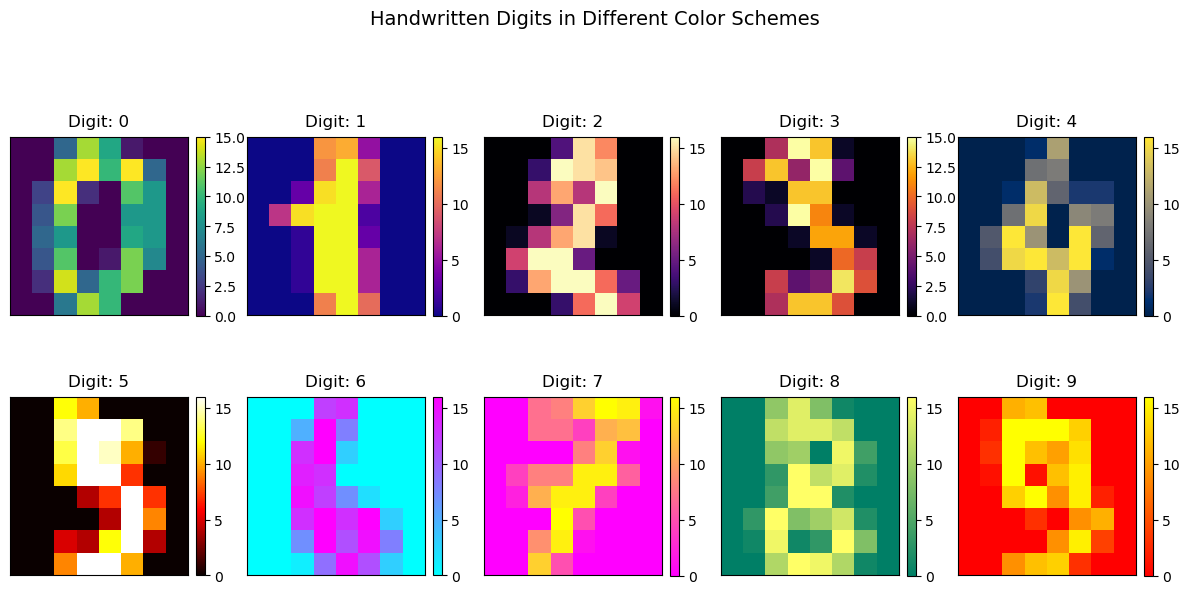

In [4]:
# Import necessary libraries
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()

# Explore the dataset
print(f"Data shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")

# Visualize the first few images and their labels
"""
Question: Visualize the Digits Dataset (2 points)
Display the first ten images from the digits dataset with their labels. Use a 2x5 grid of subplots, and ensure the grid size is 10x5. Show each image in grayscale and title it with the respective label. Adjust the layout to prevent overlap.

Hints:

Use the 'ax.imshow()' method to display an image and 'ax.set_title()' to set its title.
Write your code below:
"""

# Visualization code with multiple color schemes
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
colormaps = ['viridis', 'plasma', 'magma', 'inferno', 'cividis',
             'hot', 'cool', 'spring', 'summer', 'autumn']

for ax, image, label, cmap in zip(axes.ravel(), digits.images, digits.target, colormaps):
    # Display image with different colormaps
    im = ax.imshow(image, cmap=cmap)
    ax.set_title(f'Digit: {label}', fontsize=12, pad=8)
    
    # Remove ticks for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add colorbar
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle('Handwritten Digits in Different Color Schemes', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()



### 2. Data Preprocessing (2 points)

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
"""
Question: Dataset Splitting (2 points)
Using the digits dataset, divide it into training and testing sets. 

Hints:

Utilize the train_test_split function.
Remember to set test_size and random_state.
"""
# write the train and test split

# Spliting  the data into training and testing sets
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 81828391)

### 3. KNN Classification (2 points)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier and predict labels for the test set
"""
Question: KNN Classifier Training and Prediction (2 points)
Given the initialized KNN classifier with n_neighbors set to 5, perform the following tasks:

1- Train the classifier using the training data.
2- Predict the labels for the test dataset using the trained classifier.

Hints:

Use the 'fit' method to train the classifier.
Utilize the 'predict' method to make predictions on the test data.
"""
# fit the model
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)  # Train the model

# predict X_test and store it in y_pred

# Make predictions
y_pred = knn.predict(X_test)

### 4. Evaluation (2 points)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

"""
Question: Evaluating Classifier Performance (2 points)
After obtaining the predicted labels from the trained KNN classifier, evaluate its performance using the following metrics:

Calculate the accuracy of the classifier and display it in percentage format.
Compute the confusion matrix for the true labels and predicted labels.
Hints:

Use the accuracy_score function to get the accuracy.
The confusion_matrix function can help in deriving the confusion matrix.
"""
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=5: {accuracy*100:.2f}%")

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

Accuracy with k=5: 98.61%
Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  1]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 40  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  1  0  2  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0  0  0 33]]


### 5. Experimenting with different k values (2 points)

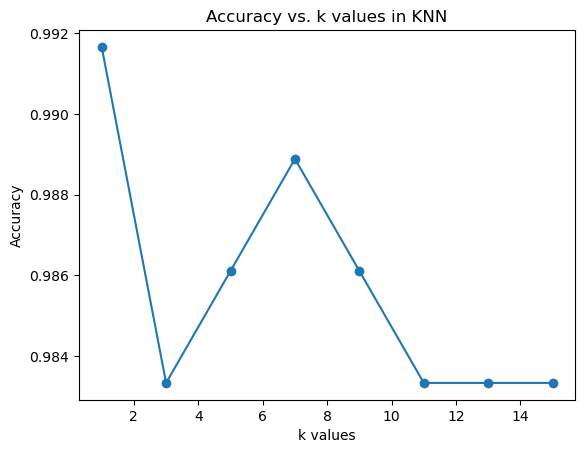

In [12]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []

"""
Question: Experimenting with Different k-values in KNN (2 points)
The k-value in KNN determines the number of neighbors to consider when making a prediction. To find an optimal k-value, perform the following:

Iterate over different k-values given in the k_values list.
For each k-value, train the KNN classifier and predict the labels for the test set.
Calculate and store the accuracy for each k-value in the accuracies list.
Finally, plot a graph of accuracy vs. k-values to visualize the performance of the KNN classifier for different k-values.

Hint:

Use a loop to iterate over each k-value.
Remember to initialize the KNN classifier with the current k-value in each iteration
"""
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Create classifier with current k
    knn.fit(X_train, y_train)  # Train
    y_pred = knn.predict(X_test)  # Predict
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies.append(accuracy)  # Store accuracy

# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k values in KNN")
plt.show()